In [1]:
#%reload_ext autoreload
#%autoreload 2
import logging
log = lambda msg: logging.info(msg)
import os
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


# Inspect frequency spike issue

In [75]:
from sleep_events import load_days_data

days_data = load_days_data(True)

In [25]:
import pandas as pd

# Data fine here - well, quite fuzzy actually
# input_file = "C:\\dev\\play\\brainwave-data-day\\2024-11-19-09-57-29\\raw.fif"

# Covered by 16.5, 27.7, 38.8, but smaller one around 8
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-20-21-30-29\\raw.fif"
# Needs [16.6, 27.7, 38.8], and smaller one around 8
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-21-21-15-26\\raw.fif"
# Covered by [16.6, 27.7, 38.8], no small one at 8
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-22-21-30-12\\raw.fif"
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-23-21-14-58\\raw.fif"
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-24-21-21-31\\raw.fif"
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-25-21-27-21\\raw.fif"
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-26-21-35-46\\raw.fif"
# Is very weird.. lots of "hills" (but croppable)
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-27-21-18-50\\raw.fif"
# Very fuzzy (but disappears if crop last 4 minutes)
# input_file = "C:\\dev\\play\\brainwave-data\\2024-11-28-21-50-57\\raw.fif"

# input_file = "C:\\dev\\play\\brainwave-data\\2024-12-10-21-14-13\\raw.fif"
# input_file = "C:\\dev\\play\\brainwave-data\\2024-12-09-21-29-08\\raw.fif"
input_file = "C:\\dev\\play\\brainwave-data\\2024-12-11-21-31-37\\raw.fif"

input_file_without_ext = os.path.splitext(input_file)[0]
input_dir = "C:\\dev\\play\\brainwave-data"
stats_df = pd.read_csv(input_dir + os.path.sep + "stats.csv")



2024-12-12 18:59:01,434 - INFO - Loading MNE file C:\dev\play\brainwave-data\2024-12-11-21-31-37\raw.fif


Opening raw data file C:\dev\play\brainwave-data\2024-12-11-21-31-37\raw.fif...
Isotrak not found
    Range : 0 ... 8629667 =      0.000 ... 34518.668 secs
Ready.
Reading 0 ... 8629667  =      0.000 ... 34518.668 secs...
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_6920\2803830814.py:6: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


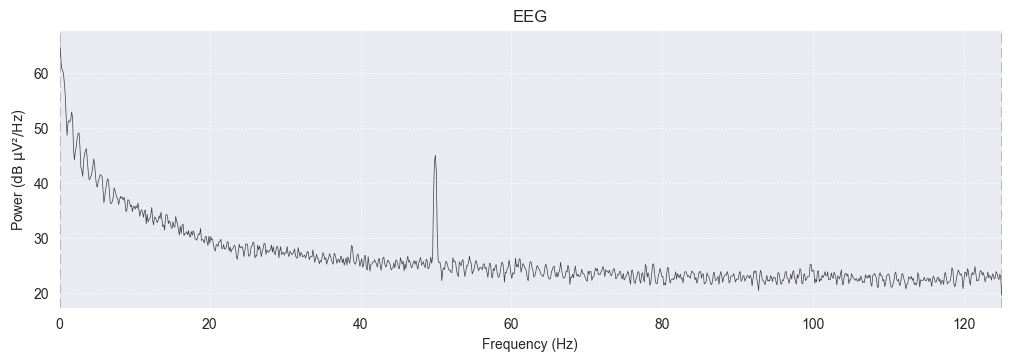

In [26]:
import mne
import convert  # Load MNE
log("Loading MNE file " + input_file)
#raw, input_file_without_ext, mne_filtered = convert.load_mne_file(log, input_file)
raw = mne.io.read_raw_fif(input_file, preload=True)
raw.compute_psd(verbose=False).plot()


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_6920\4256591613.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


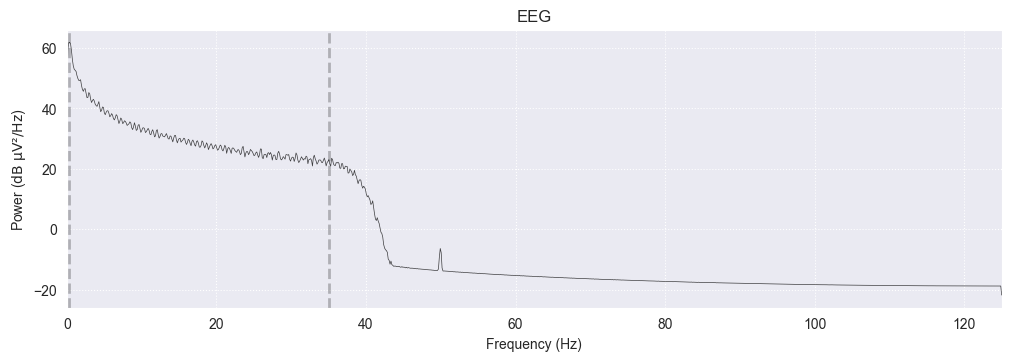

In [24]:
filtered = raw.copy()
filtered.filter(0.3, 35, verbose=False)
filtered.compute_psd(verbose=False).plot()

In [4]:
# row = days_data[days_data['dayAndNightOf'] == "2024-11-29"]

In [5]:
# row['asleepTime'].iloc[0]

In [6]:
# int(row['asleepTime'].iloc[0].timestamp())

In [7]:
# raw.times[0]

In [8]:
# raw.info['meas_date']

In [9]:
# from datetime import datetime, timezone
# import pandas as pd
# 
# # Given datetime and timestamp
# meas_date = datetime(2024, 11, 28, 21, 50, 57, 306807, tzinfo=timezone.utc)
# asleep_time = pd.Timestamp('2024-11-28 22:37:00+0000', tz='Europe/London')
# 
# # Convert asleep_time to UTC
# asleep_time_utc = asleep_time.tz_convert('UTC')
# 
# # Subtract the two times
# time_difference = asleep_time_utc - meas_date
# 
# print(time_difference.total_seconds())

In [10]:
# raw.times[-1]

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_6920\457264853.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


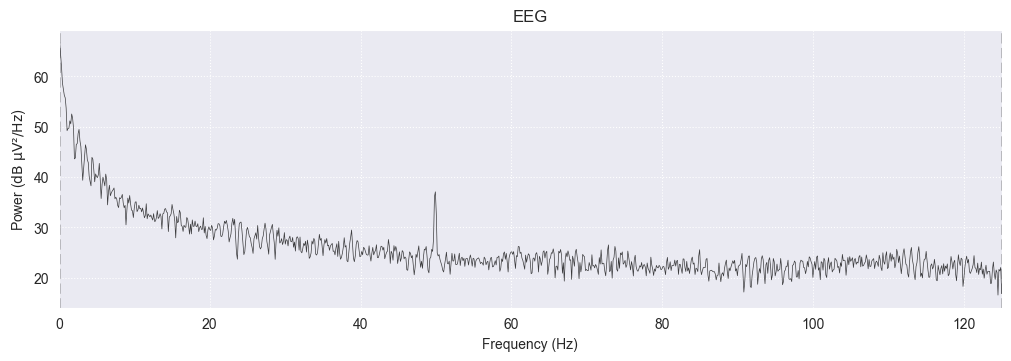

In [20]:
raw.compute_psd(verbose=False).plot()


0 34458.672 0.0 574.3112 574.3112 575.3111333333333
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_6920\3286724455.py:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_cropped.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


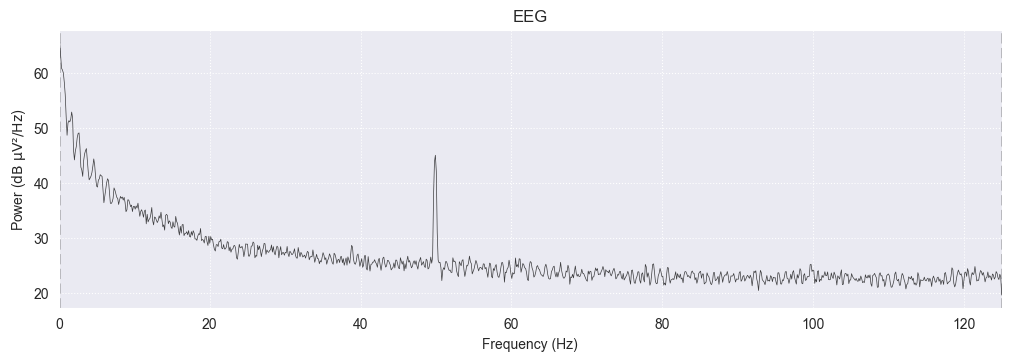

In [11]:
minutes_to_crop_from_start = 0
minutes_to_crop_from_end = 1

tmin = 60 * minutes_to_crop_from_start
# tmax = tmin + 60 * 60 * 7
# tmax = 557 * 60
tmax = raw.times[-(250 * 60 * minutes_to_crop_from_end)]
# tmax = raw.times[-20000]
# tmax = raw.times[-1]
print(tmin, tmax, tmin / 60, tmax / 60, (tmax - tmin) / 60, raw.times[-1] / 60)
raw_cropped = raw.copy().crop(tmin=tmin, tmax=tmax)
raw_cropped.compute_psd(verbose=False).plot()


In [128]:
tmin + 60 * 60 * 10

46800

In [129]:
raw.times[-20000]

33624.78

In [112]:
raw_cropped.times[-1] / (60)

60.0

In [94]:
raw_cropped.info['meas_date']

datetime.datetime(2024, 11, 29, 21, 18, 34, 68762, tzinfo=datetime.timezone.utc)

In [95]:
raw.times[-1] / (60)


601.0276

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_6920\1792600180.py:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


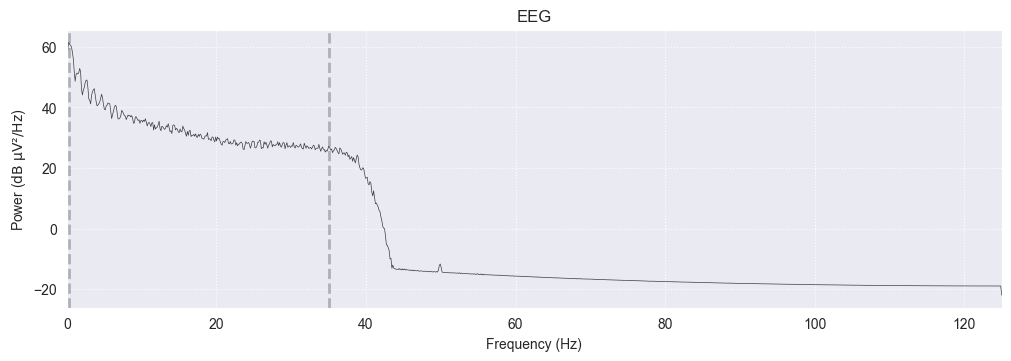

In [21]:
filtered = raw_cropped.copy()
# filtered = raw.copy()
filtered.filter(0.3, 35, verbose=False)

# Remove power
# harmonics = [50 / 3, (50 / 3) * 2, 50]
# filtered.notch_filter(freqs=harmonics, verbose=False)
# filtered.notch_filter(freqs=[16.6, 27.7, 38.8], verbose=False)
# filtered.notch_filter(freqs=[27.7], verbose=False)
# # Probably overkill given the bandstop
# filtered.notch_filter(freqs=[38.9], verbose=False)

# filtered.notch_filter(freqs=[27.7], verbose=False)
# filtered.notch_filter(freqs=[38.9], verbose=False)
# filtered.notch_filter(freqs=[16.5, 27.7, 50,100], method='spectrum_fit', verbose=False)
filtered.compute_psd(verbose=False).plot()

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\228921574.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


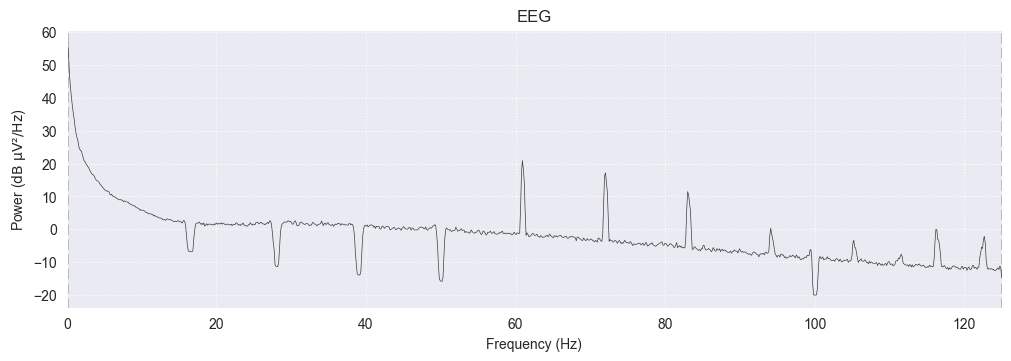

In [70]:
filtered = raw.copy()
filtered.notch_filter(freqs=[16.5, 28, 39, 50, 100], notch_widths=0.5, method='fft', verbose=False)
filtered.compute_psd(verbose=False).plot()


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\2299992425.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


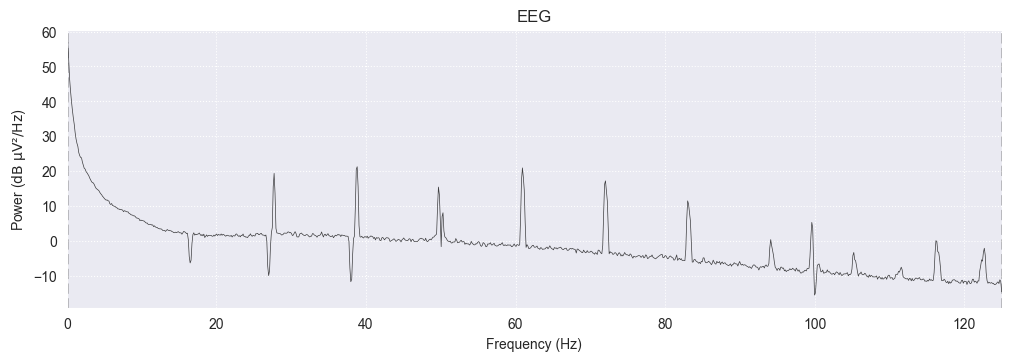

In [71]:
filtered = raw.copy()
filtered.notch_filter(freqs=[16.5, 27, 38, 50, 100], notch_widths=0.5, method='spectrum_fit', verbose=False)
filtered.compute_psd(verbose=False).plot()


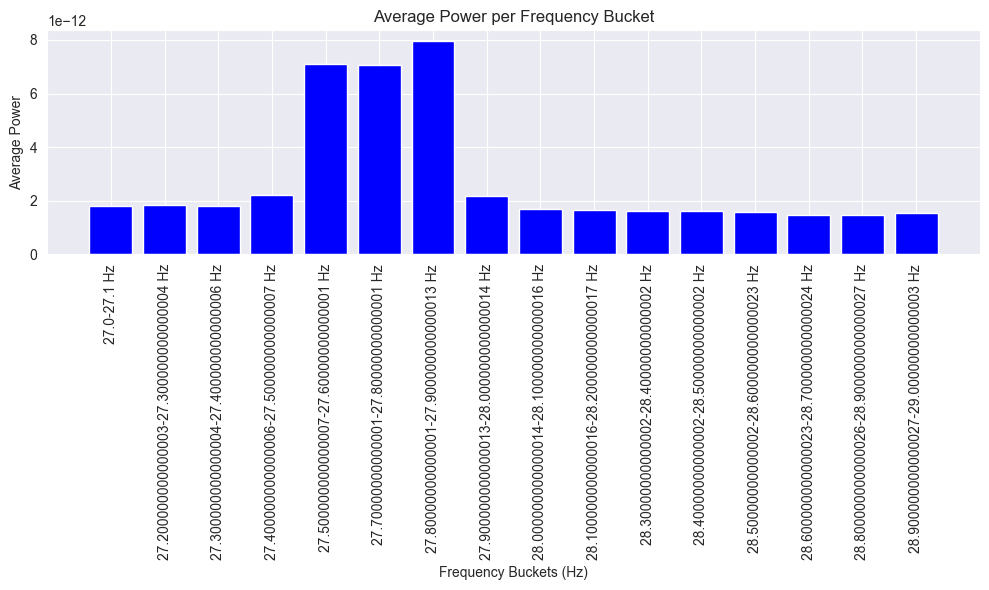

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the PSD
psd, freqs = filtered.compute_psd(verbose=False).get_data(return_freqs=True)

# Find the frequency with the highest power in each bucket
def get_max_powers(psd, freqs, buckets):
    max_powers = {}
    for bucket in buckets:
        # Mask for frequencies within the bucket range
        mask = (freqs >= bucket[0]) & (freqs < bucket[1])
        if np.any(mask):  # Check if any frequency is in the bucket
            max_power = np.max(psd[:, mask], axis=1)  # Find max power per channel
            max_powers[f"{bucket[0]}-{bucket[1]} Hz"] = max_power
    return max_powers

# Define your frequency buckets
buckets = [(i, i + 0.1) for i in np.arange(27, 29, 0.1)]

# Get the highest frequencies per bucket
highest_freqs = get_max_powers(psd, freqs, buckets)

# Prepare data for the bar graph
bucket_labels = list(highest_freqs.keys())
max_powers = [np.mean(powers) for powers in highest_freqs.values()]  # Average power per bucket

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(bucket_labels, max_powers, color='blue')
plt.xlabel('Frequency Buckets (Hz)')
plt.ylabel('Average Power')
plt.title('Average Power per Frequency Bucket')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [108]:
buckets

[(27.0, 27.1),
 (27.1, 27.200000000000003),
 (27.200000000000003, 27.300000000000004),
 (27.300000000000004, 27.400000000000006),
 (27.400000000000006, 27.500000000000007),
 (27.500000000000007, 27.60000000000001),
 (27.60000000000001, 27.70000000000001),
 (27.70000000000001, 27.80000000000001),
 (27.80000000000001, 27.900000000000013),
 (27.900000000000013, 28.000000000000014),
 (28.000000000000014, 28.100000000000016),
 (28.100000000000016, 28.200000000000017),
 (28.200000000000017, 28.30000000000002),
 (28.30000000000002, 28.40000000000002),
 (28.40000000000002, 28.50000000000002),
 (28.50000000000002, 28.600000000000023),
 (28.600000000000023, 28.700000000000024),
 (28.700000000000024, 28.800000000000026),
 (28.800000000000026, 28.900000000000027),
 (28.900000000000027, 29.00000000000003)]

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\3350292354.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


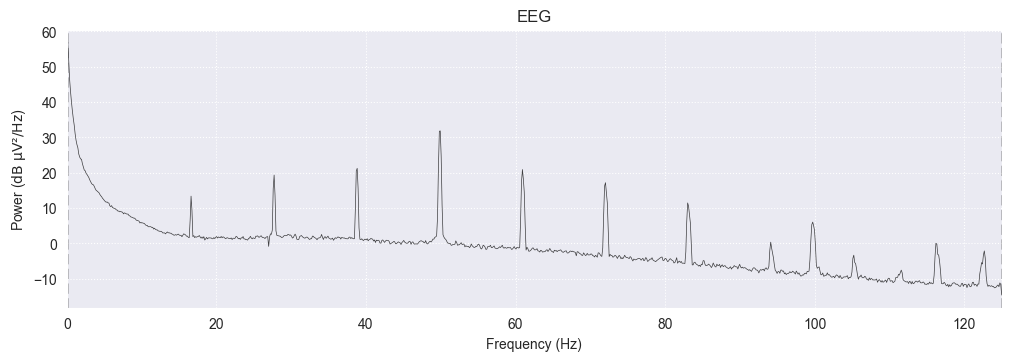

In [78]:
filtered = raw.copy()
filtered.notch_filter(freqs=[27], method='spectrum_fit', verbose=False)
filtered.compute_psd(verbose=False).plot()


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\3431389329.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


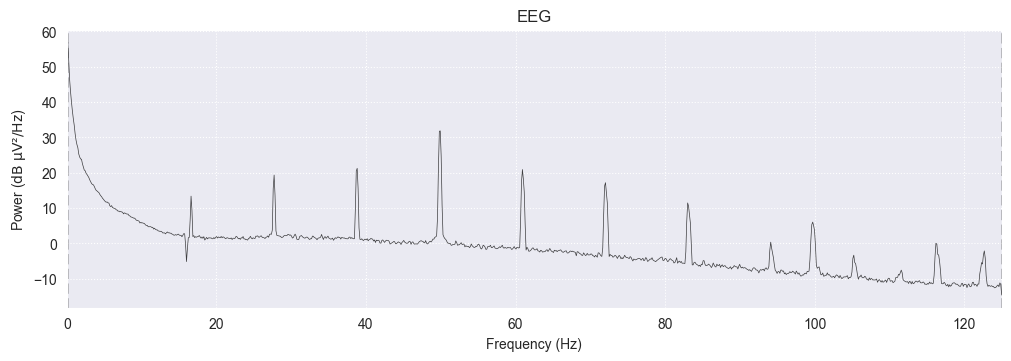

In [112]:
filtered = raw.copy()
filtered = filtered.notch_filter(freqs=[16], notch_widths=0.4, verbose=False, method='spectrum_fit')
# filtered = filtered.notch_filter(freqs=[27.7], notch_widths=0.4, verbose=False, method='spectrum_fit')
filtered.compute_psd(verbose=False).plot()


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\3476790599.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


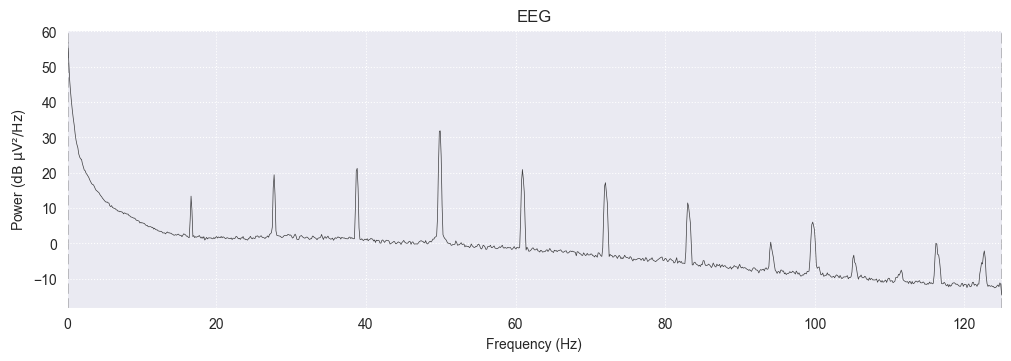

In [79]:
filtered = raw.copy()
filtered.notch_filter(freqs=[27.5], method='spectrum_fit', verbose=False)
filtered.compute_psd(verbose=False).plot()



Filtering raw data in 1 contiguous segment
Removed notch frequencies (Hz):
     28.00 : 1288 windows
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\1141756997.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


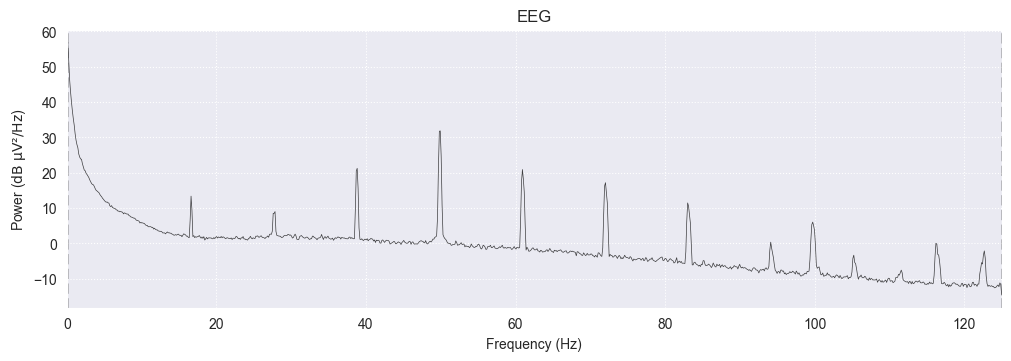

In [99]:
filtered = raw.copy()
filtered.notch_filter(freqs=[27.71], method='spectrum_fit', filter_length='60s' )
filtered.compute_psd(verbose=False).plot()

Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\333451093.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


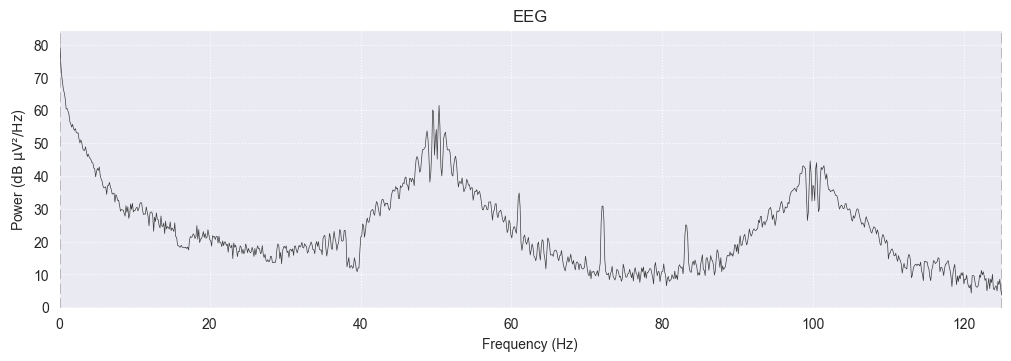

In [47]:
filtered = raw.copy()
filtered.notch_filter(freqs=[16.5, 28, 39, 50, 100], notch_widths=2.0, method='spectrum_fit', verbose=False)
filtered.compute_psd(verbose=False).plot()


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\2190805191.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


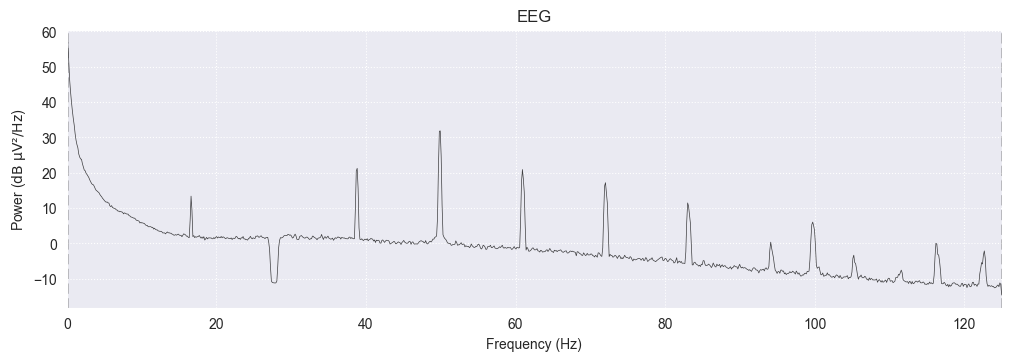

In [86]:
filtered = raw.copy()
filtered.notch_filter(freqs=[27.7], verbose=False, n_jobs=8, method='iir')
filtered.compute_psd(verbose=False).plot()



Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\4130528781.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


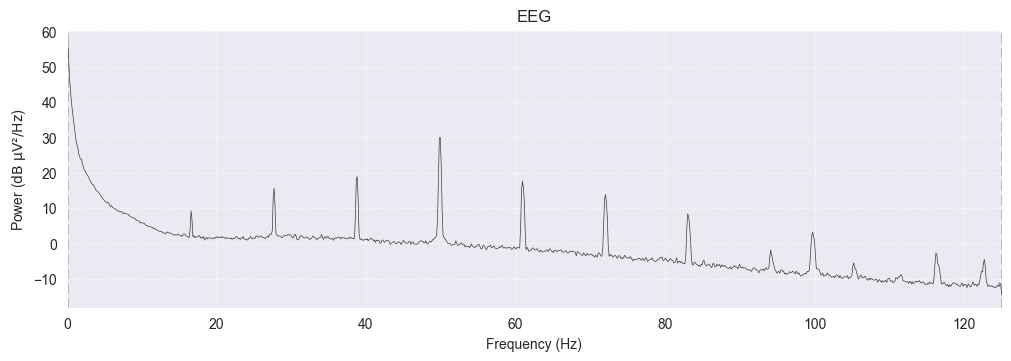

In [87]:
filtered = raw.copy()
filtered.notch_filter(freqs=None, verbose=False, n_jobs=8, method='spectrum_fit')
filtered.compute_psd(verbose=False).plot()



Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\3586145114.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


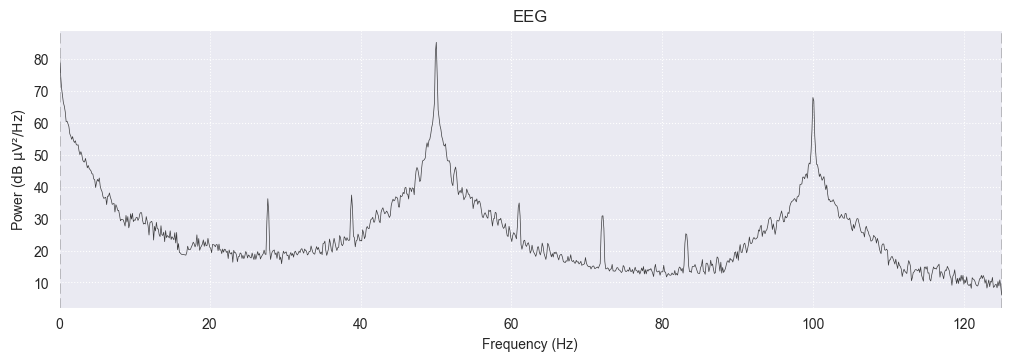

In [48]:
filtered = raw.copy()
filtered.notch_filter(freqs=[16.5], method='iir', verbose=False)
filtered.compute_psd(verbose=False).plot()


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\1563096256.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


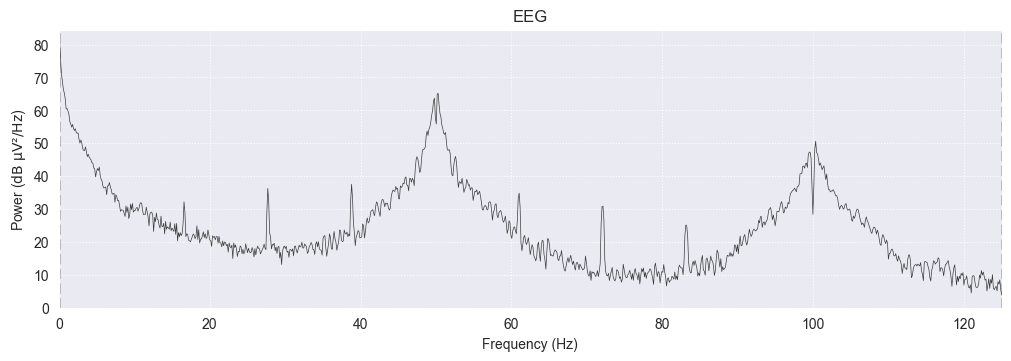

In [50]:
filtered = raw.copy()
filtered.notch_filter(freqs=[16.5, 28, 39, 50, 100], mt_bandwidth=4.0, method='spectrum_fit', verbose=False)
filtered.compute_psd(verbose=False).plot()


Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\graha\AppData\Local\Temp\ipykernel_24536\85117340.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  filtered.compute_psd(verbose=False).plot()
C:\Users\graha\.conda\envs\tf\lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


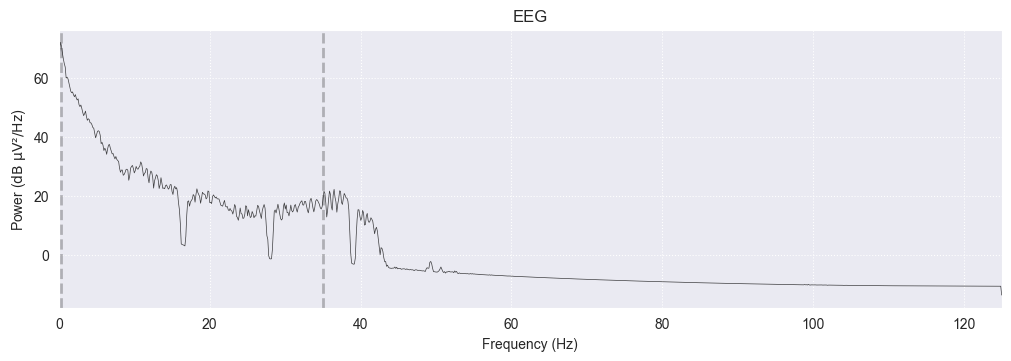

In [33]:
filtered.notch_filter(freqs=[16.5, 28, 39, 50, 100], notch_widths=0.5, method='fir', verbose=False)
filtered.compute_psd(verbose=False).plot()
